In [ ]:
#Author: kach@microsoft.com | kannaxp@gmail.com
#Date: 2022-05-23
#ref: https://thinkinfi.com/fasttext-word-embeddings-python-implementation/

In [6]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

In [11]:
import nltk
#nltk.download('stopwords')
en_stop=set(nltk.corpus.stopwords.words('english'))

# Lemmatization
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [10]:
#For word embeddings
from gensim.models.fasttext import FastText

In [12]:
#For visualizing the results
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data
df=pd.read_excel('./data/comments.xlsx')

In [3]:
df

,ID,Score,Comments
0,1,0,So confusing accessing my subscription and how...
1,2,0,The subscription can only be deleted 3 days af...
2,3,10,it's the only place to go for managing azure s...
3,4,1,Your subscription and login management is terr...
4,5,0,I don't know why my subscription was canceled....
...,...,...,...
1796,1834,10,Very easy to use and switch between different ...
1797,1835,7,i dont sure how much its cost and when my free...
1798,1836,2,Azure active directory configuration is requir...
1799,1837,3,This is still quite confusing - at least to me...


In [4]:
all_sent=list(df['Comments'])

In [17]:
# Text cleaning function for gensim fastText word embeddings in python
def process_text(document):
        # Remove extra white space from text
        document = re.sub(r'\s+', ' ', document, flags=re.I)
         
        # Remove all the special characters from text
        document = re.sub(r'\W', ' ', str(document))
 
        # Remove all single characters from text
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
 
        # Converting to Lowercase
        document = document.lower()
 
        # Word tokenization       
        tokens = document.split()
        # Lemmatization using NLTK
        lemma_txt = [stemmer.lemmatize(word) for word in tokens]
        # Remove stop words
        lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
        # Drop words 
        tokens = [word for word in tokens if len(word) > 3]
                 
        clean_txt = ' '.join(lemma_no_stop_txt)
 
        return clean_txt

In [18]:
#Creating clean corpus
clean_corpus = [process_text(str(sentence)) for sentence in tqdm(all_sent) if str(sentence).strip() !='']
 
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(clean_corpus)]
word_tokens



  0%|                                                                                         | 0/1801 [00:00<?, ?it/s]

 14%|██████████▌                                                                  | 247/1801 [00:00<00:00, 2441.54it/s]

 27%|████████████████████▊                                                        | 488/1801 [00:00<00:00, 2374.07it/s]

 38%|█████████████████████████████▌                                               | 690/1801 [00:00<00:00, 2239.72it/s]

 49%|█████████████████████████████████████▊                                       | 883/1801 [00:00<00:00, 2131.86it/s]

 58%|███████████████████████████████████████████▉                                | 1040/1801 [00:00<00:00, 1900.07it/s]

 71%|█████████████████████████████████████████████████████▊                      | 1275/1801 [00:00<00:00, 1987.52it/s]

 81%|█████████████████████████████████████████████████████████████▏              | 1451/1801 [00:00<00:00, 1854.51it/s]

100%|█████████████████████████

[['confusing',
  'accessing',
  'subscription',
  'navigate',
  'billing',
  'visual',
  'studio',
  'subscription',
  'worst',
  'experience',
  'ever'],
 ['subscription',
  'deleted',
  '3',
  'day',
  'canceled',
  'learn',
  'shit',
  'fucking',
  'personal',
  'card',
  'removal',
  'keeping',
  'dead',
  'card',
  'file',
  'dumshits',
  'done',
  'nice',
  'fuck',
  'sake',
  'want',
  'pay',
  'motherfucker',
  'cannot'],
 ['place',
  'go',
  'managing',
  'azure',
  'subscription',
  'like',
  'alternate',
  'seriously',
  'complete',
  'spite',
  'quirk',
  'quite',
  'usable'],
 ['subscription', 'login', 'management', 'terrible'],
 ['know',
  'subscription',
  'wa',
  'canceled',
  'explain',
  'wa',
  'subscription',
  'cancelled'],
 ['mjltiple', 'subscription', 'find', 'hard', 'move', 'around'],
 ['difficult',
  'get',
  'overview',
  'sent',
  'around',
  'circle',
  'trying',
  'seemingly',
  'simple',
  'thing',
  'like',
  'adding',
  'subscription'],
 ['see', 'subscri

In [37]:
#Training fasttext word embeddings

# Defining values for parameters
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

In [38]:
%%time
fast_Text_model = FastText(word_tokens,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      epochs=100)

Wall time: 53.2 s


<li>vector_size: Dimensionality of the word vectors. 
<li>window=window_size
<li>min_count: The model ignores all words with total frequency lower than this.
<li>sample: The threshold for configuring which higher-frequency words are randomly down sampled, useful range is (0, 1e-5).
<li> workers: Use these many worker threads to train the model (=faster training with multicore machines).
<li> sg: Training algorithm: skip-gram if sg=1, otherwise CBOW.
epochs(iter): Number of iterations (epochs) over the corpus.

In [39]:
#saving and load gensim fasttext word embeddings 
from gensim.models import Word2Vec
# Save fastText gensim model
fast_Text_model.save("ft_model_surveyVerbatim")
# Load saved gensim fastText model
fast_Text_model = Word2Vec.load("ft_model_surveyVerbatim")

In [40]:
# Check word embedding for a perticular word
fast_Text_model.wv['azure']

array([ 1.57570839e-03, -1.57606259e-01,  4.54048365e-02, -8.02608356e-02,
       -2.13696793e-01, -7.84149840e-02,  1.84772477e-01, -1.16756693e-01,
       -1.21020570e-01, -2.84857064e-01,  1.26823619e-01, -2.81837106e-01,
        7.83713534e-02, -1.22837104e-01,  1.73486486e-01, -1.28272876e-01,
        2.51535505e-01,  2.21436486e-01, -2.14168966e-01, -2.07035784e-02,
       -2.94314008e-02, -8.00203010e-02, -2.21874043e-01, -7.99267590e-02,
       -1.33903727e-01,  1.55232459e-01, -3.78312869e-03, -2.61476874e-01,
        1.18672997e-01, -8.80000889e-02, -1.07353754e-01, -3.43838297e-02,
        1.00328915e-01, -3.43852751e-02,  7.14960545e-02,  7.82985985e-02,
        1.29270881e-01,  2.51051992e-01, -1.53535396e-01,  3.01241964e-01,
       -3.98154594e-02, -1.78136066e-01, -1.09925508e-01,  2.88766026e-01,
       -1.48856014e-01, -3.47633272e-01,  4.86723520e-02, -1.79979891e-01,
       -8.27528760e-02, -2.60668576e-01,  2.44393259e-01,  1.37468735e-02,
       -1.43176407e-01,  

In [41]:
# Dimention must be 300
fast_Text_model.wv['azure'].shape

(300,)

In [42]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('azure', topn=10)

[('ãƒ', 0.34956619143486023),
 ('az', 0.3447754383087158),
 ('unappealing', 0.34038257598876953),
 ('technical', 0.33334851264953613),
 ('struggling', 0.32992786169052124),
 ('æ', 0.3204510807991028),
 ('console', 0.3156006932258606),
 ('benefit', 0.3062990605831146),
 ('question', 0.2987923324108124),
 ('ç', 0.29196277260780334)]

In [43]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('billing', topn=10)

[('bill', 0.46572476625442505),
 ('telling', 0.4195725619792938),
 ('cancelling', 0.41680243611335754),
 ('statement', 0.3711535632610321),
 ('billed', 0.36085769534111023),
 ('struggling', 0.3357434570789337),
 ('waiting', 0.32948026061058044),
 ('disables', 0.32160037755966187),
 ('insane', 0.31496188044548035),
 ('dealing', 0.31466224789619446)]

In [44]:
# Check top 10 similarity score between two word
fast_Text_model.wv.similarity('billing', 'pricing')

0.17616543

In [45]:
# Check top 10 similarity score between two word
fast_Text_model.wv.similarity('billing', 'statement')

0.3711535

In [47]:
# Most opposite to a word
fast_Text_model.wv.most_similar(negative=["billing"], topn=10)

[('private', 0.067027248442173),
 ('activity', 0.03871649503707886),
 ('database', 0.03608987480401993),
 ('da', 0.016881223767995834),
 ('search', 0.015463047660887241),
 ('maybe', 0.015200530178844929),
 ('log', 0.01040499284863472),
 ('box', 0.004887817427515984),
 ('cheaper', 0.0009416595567017794),
 ('close', -0.0005421426612883806)]

In [48]:
#Visualing 
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')


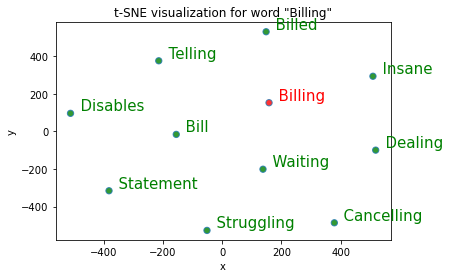

In [49]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='billing', w2v_model=fast_Text_model)

In [52]:
#Update pre-trained Gensim fastText model
new_data = [['yes', 'this', 'is', 'the', 'word2vec', 'model'],[ 'if',"you","have","think","about","it"]]
 
# Update trained gensim fastText model
fast_Text_model.build_vocab(new_data, update = True)
 
# Update gensim fastText model using new data
new_model = fast_Text_model.train(new_data, total_examples=fast_Text_model.corpus_count, epochs=fast_Text_model.epochs)


## Pre-trained Fast Text Model

In [ ]:
install bso build tools
pip install fasttext
then run the below commands
then try similarity using pre-trained fast text


In [56]:
import fasttext

ModuleNotFoundError: No module named 'fasttext'

In [55]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

ModuleNotFoundError: No module named 'fasttext'

In [54]:
# Load pretrained fastText word embeddings python with gensim
from gensim.models.fasttext import load_facebook_model
pretrained_fastText_en = load_facebook_model('pretrined fastText model/cc.en.300.bin.gz')

FileNotFoundError: [Errno 2] No such file or directory: 'pretrined fastText model/cc.en.300.bin.gz'